### **Homework Assignment 2: Imputation-Evaluation**

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import zscore


In [2]:
file_path1 = 'hw-2-test-data.csv'
file_path2 = 'hw-2-training-data.csv'

df_testing = pd.read_csv(file_path1)
df_training = pd.read_csv(file_path2)

In [3]:
df_training.head(5)


,gender,age,bmi,systolic_bp,diastolic_bp,exercise_frequency,smoker,family_history,diet_quality,us_state,shoe_size,cholesterol_level,has_disease
0,Female,63,26.051019,96.865801,74.879872,Regularly,0.0,0.0,Poor,PA,5.560992,208.921743,1
1,Male,51,28.999501,115.878612,113.660525,Regularly,1.0,0.0,Average,PA,12.098365,246.817639,1
2,Female,76,21.135693,144.846268,132.404670,Rarely,0.0,0.0,Poor,FL,6.751833,232.486516,1
3,Male,77,21.610457,NaN,128.789122,Rarely,0.0,0.0,NaN,MI,11.893455,273.670761,1
4,Female,68,22.311965,163.945914,84.559669,Frequently,1.0,0.0,Average,NY,6.983366,208.985119,1


### 1. Exploratory Data Analysis

In [4]:
df_training.describe()

,age,bmi,systolic_bp,diastolic_bp,smoker,family_history,shoe_size,cholesterol_level,has_disease
count,2000.00000,1808.000000,1799.000000,1786.000000,1793.000000,1808.000000,2000.000000,1798.000000,2000.000000
mean,48.85950,26.344389,135.171377,89.927616,0.491355,0.497235,9.087420,200.182596,0.500000
std,18.16942,6.129855,32.525098,21.605908,0.500065,0.500131,2.482624,63.609497,0.500125
min,18.00000,-30.416670,-160.014136,-88.834527,0.000000,0.000000,5.001726,-326.500224,0.000000
25%,34.00000,21.890592,110.033893,73.460413,0.000000,0.000000,6.662188,159.162338,0.000000
50%,49.00000,26.130707,134.482817,88.391699,0.000000,0.000000,9.176034,198.513944,0.500000
75%,64.25000,30.555388,158.019690,104.559413,1.000000,1.000000,11.572424,237.127907,1.000000
max,80.00000,57.274114,314.622726,223.034901,1.000000,1.000000,13.000000,730.549039,1.000000


In [5]:
df_training.describe(include='object')

,gender,exercise_frequency,diet_quality,us_state
count,2000,1797,1809,2000
unique,2,4,3,10
top,Male,Frequently,Average,TX
freq,1009,481,612,220


In [6]:
def Z_scoring (data_4Z, Z_col, Z_omit):
    data_4Z['Z_Score'] = zscore(data_4Z[Z_col], nan_policy='omit')
    # outliers_z_score = data_4Z[np.abs(data_4Z['Z_Score']) > Z_omit]
    df_no_outliers_z = data_4Z[np.abs(data_4Z['Z_Score']) <= Z_omit]
    return df_no_outliers_z #, len(outliers_z_score)

In [7]:
DF_clean = Z_scoring(df_training, 'age', 3.5)

cols_forZ = ['bmi', 'systolic_bp', 'diastolic_bp', 'shoe_size', 'cholesterol_level']

for col in cols_forZ:
    DF_clean = Z_scoring(DF_clean, col, 3.5)    



In [8]:
DF_clean_test = Z_scoring(df_testing, 'age', 3.5)

for col in cols_forZ:
    DF_clean_test = Z_scoring(DF_clean_test, col, 3.5)    

In [9]:
DF_clean.head()

,gender,age,bmi,systolic_bp,diastolic_bp,exercise_frequency,smoker,family_history,diet_quality,us_state,shoe_size,cholesterol_level,has_disease,Z_Score
0,Female,63,26.051019,96.865801,74.879872,Regularly,0.0,0.0,Poor,PA,5.560992,208.921743,1,0.135026
1,Male,51,28.999501,115.878612,113.660525,Regularly,1.0,0.0,Average,PA,12.098365,246.817639,1,0.713933
2,Female,76,21.135693,144.846268,132.404670,Rarely,0.0,0.0,Poor,FL,6.751833,232.486516,1,0.495007
4,Female,68,22.311965,163.945914,84.559669,Frequently,1.0,0.0,Average,NY,6.983366,208.985119,1,0.135994
6,Female,49,38.715967,103.623890,103.197807,Never,0.0,NaN,Good,TX,11.047232,267.321069,1,1.027149


In [10]:
print(f"\nMissing Values:\n{DF_clean.isnull().sum()}")



Missing Values:
gender                  0
age                     0
bmi                     0
systolic_bp             0
diastolic_bp            0
exercise_frequency    127
smoker                142
family_history        122
diet_quality          127
us_state                0
shoe_size               0
cholesterol_level       0
has_disease             0
Z_Score                 0
dtype: int64


In [11]:
df_imputed = DF_clean.copy()

df_imputed['diet_quality'].fillna(df_imputed['diet_quality'].mode().iloc[0], inplace=True)
df_imputed['exercise_frequency'].fillna(df_imputed['exercise_frequency'].mode().iloc[0], inplace=True)
df_imputed['smoker'].fillna(df_imputed['smoker'].median(), inplace=True)
df_imputed['family_history'].fillna(df_imputed['family_history'].median(), inplace=True)

C:\Users\Black Knight\AppData\Local\Temp\ipykernel_32728\773934888.py:3: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df_imputed['diet_quality'].fillna(df_imputed['diet_quality'].mode().iloc[0], inplace=True)
C:\Users\Black Knight\AppData\Local\Temp\ipykernel_32728\773934888.py:4: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we

In [12]:
df_imputedt = DF_clean_test.copy()

df_imputedt['diet_quality'].fillna(df_imputedt['diet_quality'].mode().iloc[0], inplace=True)
df_imputedt['exercise_frequency'].fillna(df_imputedt['exercise_frequency'].mode().iloc[0], inplace=True)
df_imputedt['smoker'].fillna(df_imputedt['smoker'].median(), inplace=True)
df_imputedt['family_history'].fillna(df_imputedt['family_history'].median(), inplace=True)




C:\Users\Black Knight\AppData\Local\Temp\ipykernel_32728\3666141740.py:3: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df_imputedt['diet_quality'].fillna(df_imputedt['diet_quality'].mode().iloc[0], inplace=True)
C:\Users\Black Knight\AppData\Local\Temp\ipykernel_32728\3666141740.py:4: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on whic

In [13]:
print(f"\nMissing Values:\n{df_imputed.isnull().sum()}")



Missing Values:
gender                0
age                   0
bmi                   0
systolic_bp           0
diastolic_bp          0
exercise_frequency    0
smoker                0
family_history        0
diet_quality          0
us_state              0
shoe_size             0
cholesterol_level     0
has_disease           0
Z_Score               0
dtype: int64


In [14]:
df_imputed.to_csv('csv_output.csv', index=False)  

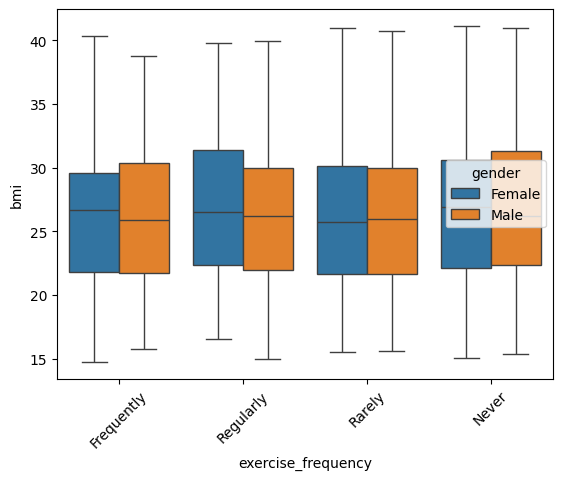

In [15]:
df = df_imputed.copy()

desired_order = ['Frequently', 'Regularly', 'Rarely', 'Never'] 

sns.boxplot(data=df, x='exercise_frequency', y='bmi', hue= 'gender', order=desired_order)
plt.xticks(rotation=45)
plt.show()

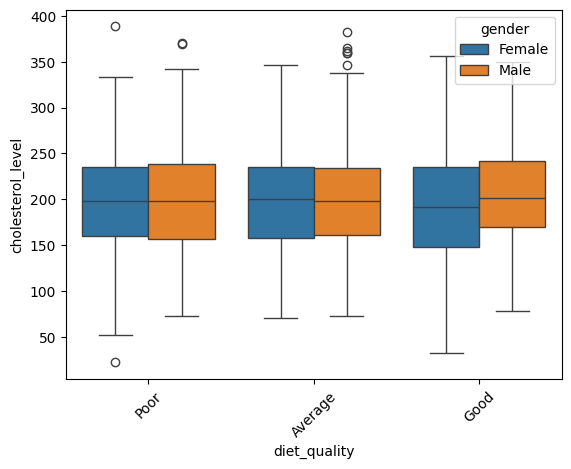

In [16]:

sns.boxplot(data=df, x='diet_quality', y='cholesterol_level', hue= 'gender')
plt.xticks(rotation=45)
plt.show()

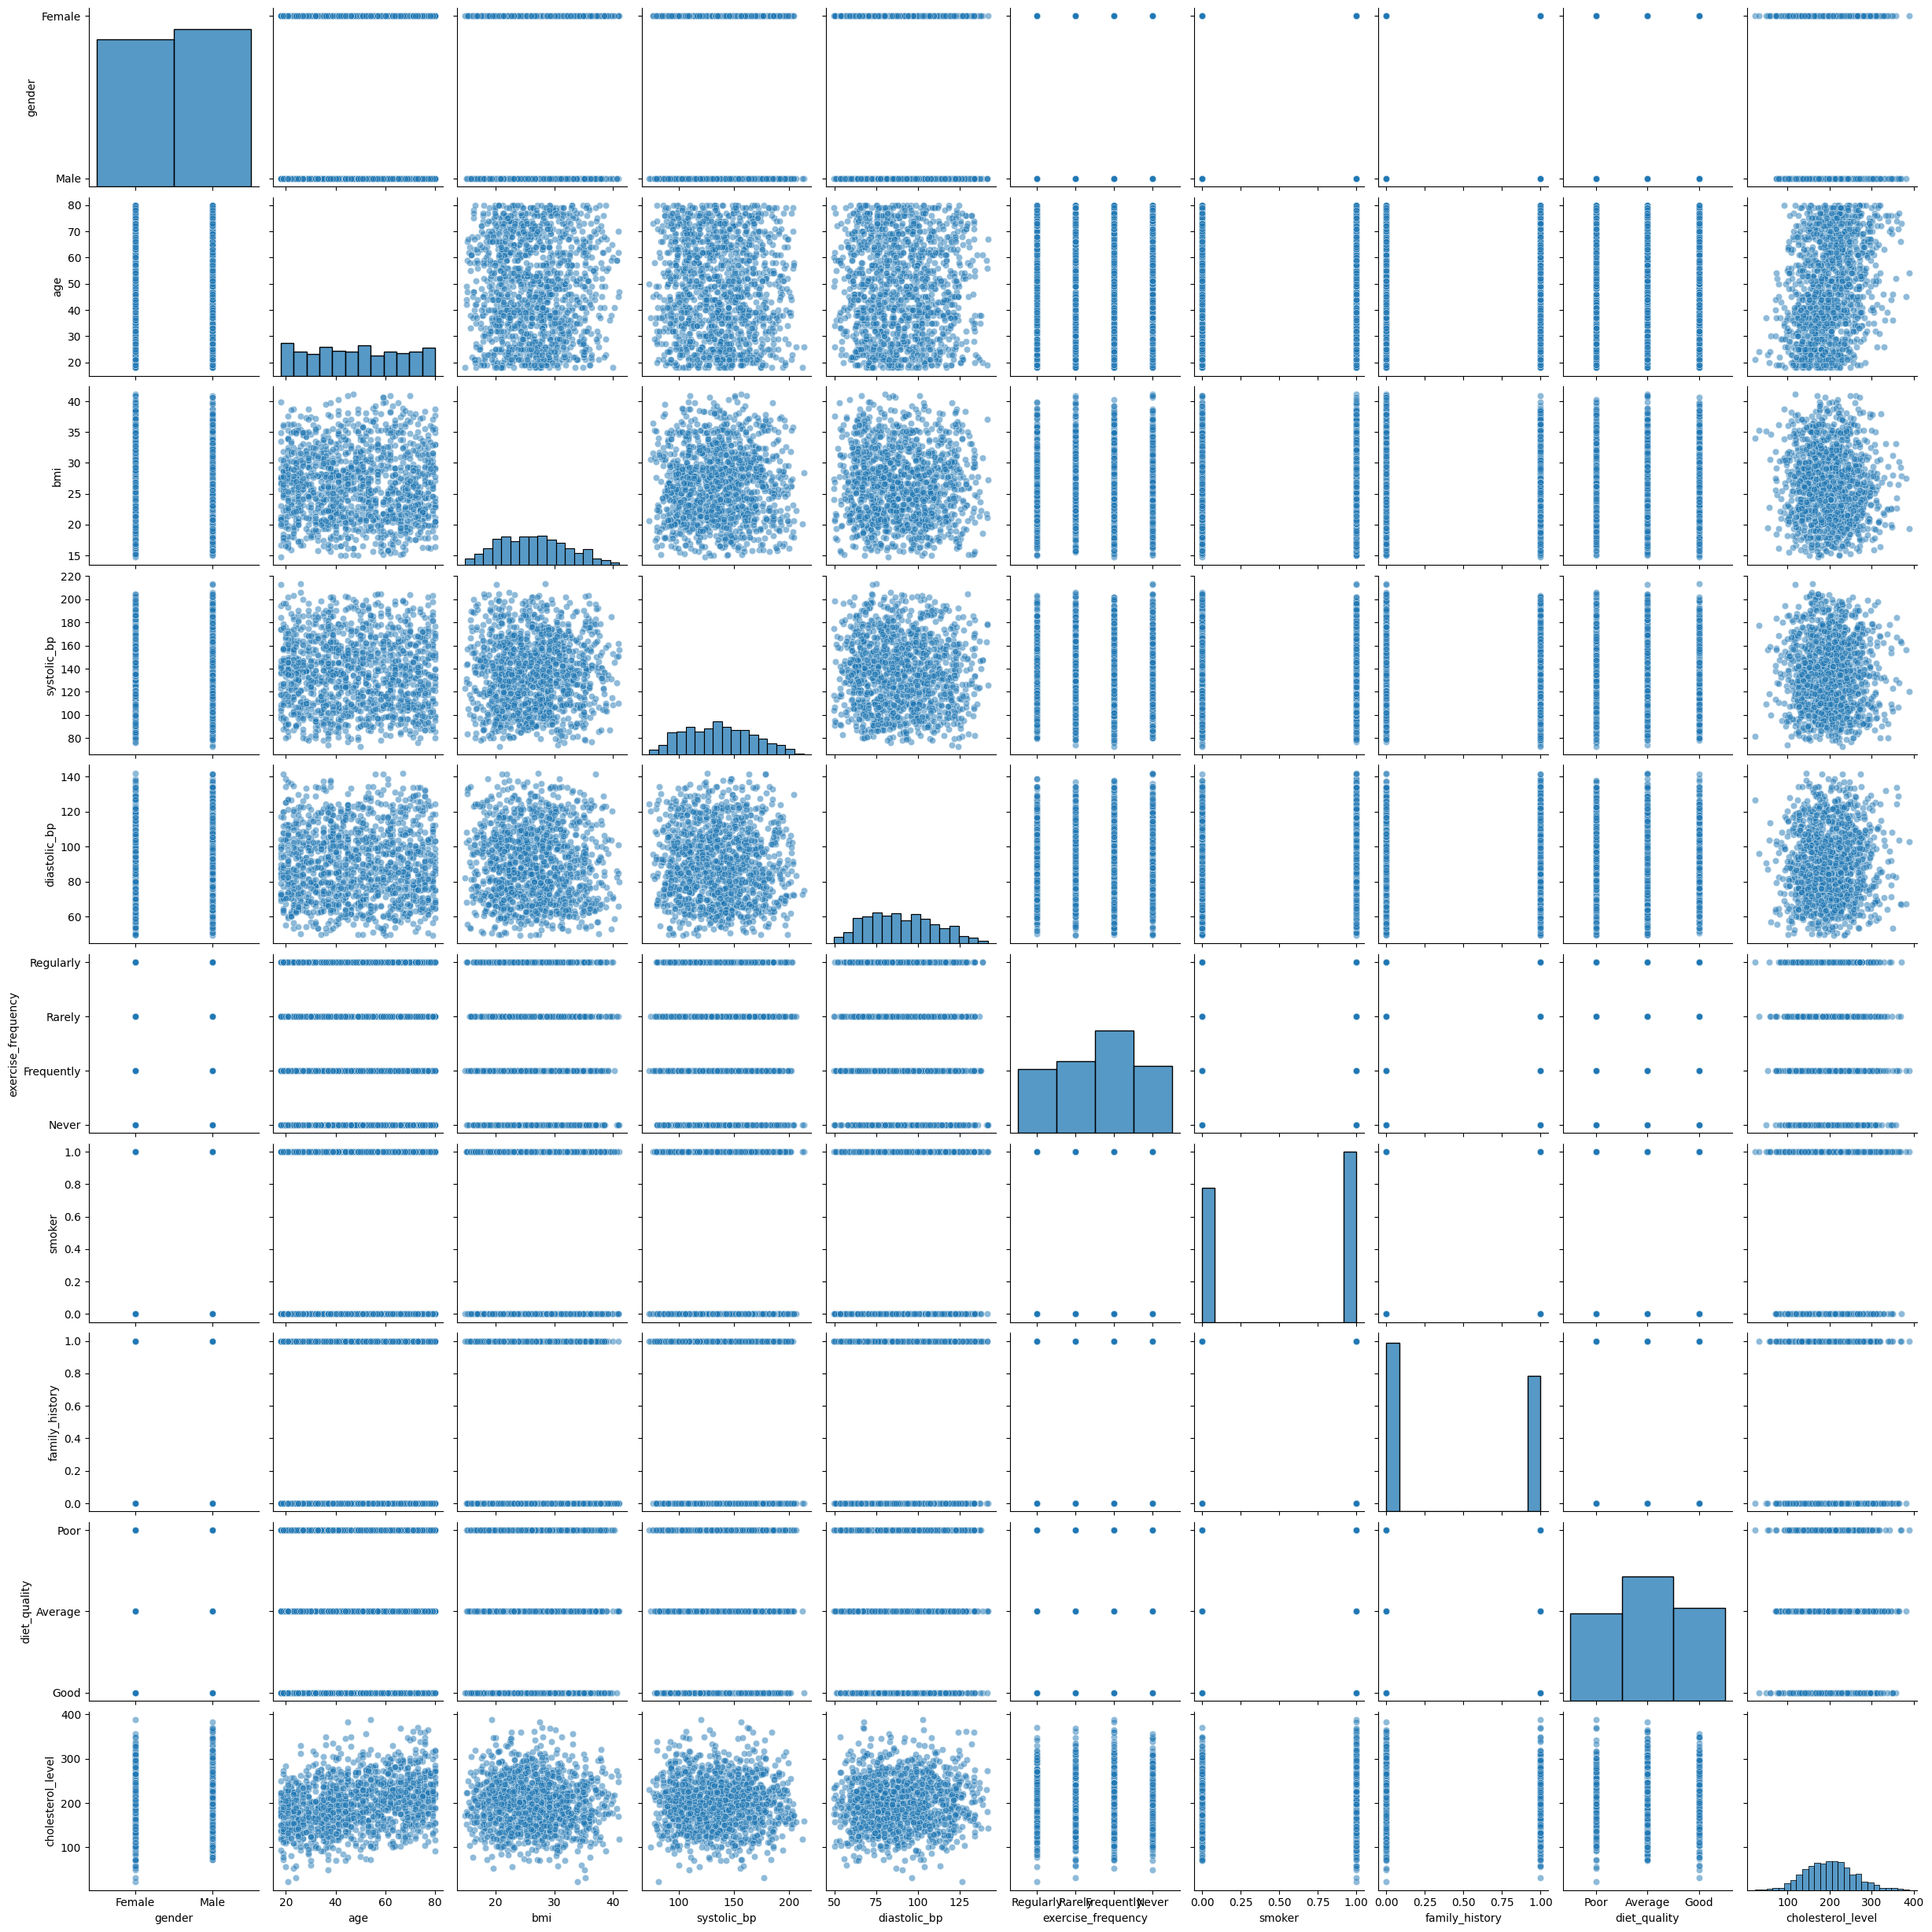

In [17]:
sns.pairplot(df, vars= ["gender", "age", "bmi", "systolic_bp", "diastolic_bp", "exercise_frequency", "smoker", "family_history", "diet_quality", "cholesterol_level"], plot_kws={'alpha': 0.5})

### 2. Data Preparation

In [18]:
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import OneHotEncoder
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import OrdinalEncoder

In [19]:
df.head()

,gender,age,bmi,systolic_bp,diastolic_bp,exercise_frequency,smoker,family_history,diet_quality,us_state,shoe_size,cholesterol_level,has_disease,Z_Score
0,Female,63,26.051019,96.865801,74.879872,Regularly,0.0,0.0,Poor,PA,5.560992,208.921743,1,0.135026
1,Male,51,28.999501,115.878612,113.660525,Regularly,1.0,0.0,Average,PA,12.098365,246.817639,1,0.713933
2,Female,76,21.135693,144.846268,132.404670,Rarely,0.0,0.0,Poor,FL,6.751833,232.486516,1,0.495007
4,Female,68,22.311965,163.945914,84.559669,Frequently,1.0,0.0,Average,NY,6.983366,208.985119,1,0.135994
6,Female,49,38.715967,103.623890,103.197807,Never,0.0,0.0,Good,TX,11.047232,267.321069,1,1.027149


In [20]:
df_test = df_imputedt.copy()

df_clean = df.drop(["us_state", "shoe_size", "Z_Score"], axis=1, inplace=False)  
df_clean_test = df_test.drop(["us_state", "shoe_size", "Z_Score"], axis=1, inplace=False)  


In [21]:
exrcse_frquncy = ['Never', 'Rarely', 'Regularly', 'Frequently']
dt_qulty = ['Poor', 'Average', 'Good']

encoder = OrdinalEncoder(categories=[exrcse_frquncy, dt_qulty])

columns_to_encode = ['exercise_frequency', 'diet_quality']
data_to_encode = df_clean[columns_to_encode]

encoded_data = encoder.fit_transform(data_to_encode)
encoded_df = pd.DataFrame(encoded_data, columns=[f'{col}_encoded' for col in columns_to_encode], index=df_clean.index)

df_encoded = pd.concat([df_clean, encoded_df], axis=1)

In [22]:
data_test_encode = df_clean_test[columns_to_encode]
encoded_dtest = encoder.fit_transform(data_test_encode)

encoded_testdf = pd.DataFrame(encoded_dtest, columns=[f'{col}_encoded' for col in columns_to_encode], index=df_clean_test.index)
test_df_encoded = pd.concat([df_clean_test, encoded_testdf], axis=1)

In [23]:
df1 = df_encoded.copy()
label_encoder = LabelEncoder()

columns_to_encode = ['gender']
df1[columns_to_encode] = df1[columns_to_encode].apply(LabelEncoder().fit_transform)

In [24]:
test_df_encoded.head()

df1t = test_df_encoded.copy()
label_encoder = LabelEncoder()

columns_to_encode = ['gender']
df1t[columns_to_encode] = df1t[columns_to_encode].apply(LabelEncoder().fit_transform)

In [25]:
DF_clean = df1.drop(["exercise_frequency", "diet_quality"], axis=1, inplace=False)  
DF_clean.head(10)

,gender,age,bmi,systolic_bp,diastolic_bp,smoker,family_history,cholesterol_level,has_disease,exercise_frequency_encoded,diet_quality_encoded
0,0,63,26.051019,96.865801,74.879872,0.0,0.0,208.921743,1,2.0,0.0
1,1,51,28.999501,115.878612,113.660525,1.0,0.0,246.817639,1,2.0,1.0
2,0,76,21.135693,144.846268,132.404670,0.0,0.0,232.486516,1,1.0,0.0
4,0,68,22.311965,163.945914,84.559669,1.0,0.0,208.985119,1,3.0,1.0
6,0,49,38.715967,103.623890,103.197807,0.0,0.0,267.321069,1,0.0,2.0
8,1,68,32.780528,92.220311,72.641384,1.0,1.0,259.461598,1,0.0,2.0
9,1,26,26.887659,107.869761,89.453615,1.0,1.0,111.587409,0,2.0,2.0
10,1,45,21.677845,148.618682,84.327543,1.0,1.0,134.759843,0,3.0,1.0
12,1,73,29.316246,106.644997,133.803481,1.0,1.0,241.322241,1,2.0,1.0
13,1,18,20.748544,135.913895,87.930538,0.0,1.0,223.211990,0,3.0,2.0


In [26]:
DF_clean_test2 = df1t.drop(["exercise_frequency", "diet_quality"], axis=1, inplace=False)  
DF_clean_test2.head(10)

,gender,age,bmi,systolic_bp,diastolic_bp,smoker,family_history,cholesterol_level,exercise_frequency_encoded,diet_quality_encoded
0,0,60,32.108912,137.000881,108.223246,1.0,0.0,245.076690,3.0,1.0
1,0,36,34.065560,116.181950,84.054499,0.0,0.0,192.701583,0.0,0.0
3,0,19,16.701607,104.290525,60.408635,0.0,1.0,116.808171,3.0,2.0
5,0,35,17.024173,89.987243,91.899183,0.0,0.0,201.577246,2.0,0.0
8,0,25,30.644748,184.996936,95.562777,0.0,1.0,177.539763,1.0,2.0
9,0,66,22.139233,92.441096,124.896858,0.0,0.0,273.265797,0.0,0.0
10,0,77,27.568576,164.260488,86.671407,1.0,0.0,277.266132,1.0,1.0
11,1,51,24.471002,180.836853,93.011545,1.0,0.0,279.889505,0.0,0.0
12,1,28,22.882486,116.178496,110.626589,0.0,1.0,105.539058,1.0,1.0
13,1,52,30.784548,142.381440,70.206688,0.0,0.0,245.634741,2.0,1.0


In [27]:
print(f"\nMissing Values:\n{DF_clean.isnull().sum()}")


Missing Values:
gender                        0
age                           0
bmi                           0
systolic_bp                   0
diastolic_bp                  0
smoker                        0
family_history                0
cholesterol_level             0
has_disease                   0
exercise_frequency_encoded    0
diet_quality_encoded          0
dtype: int64


In [28]:
DF_clean.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1298 entries, 0 to 1996
Data columns (total 11 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   gender                      1298 non-null   int64  
 1   age                         1298 non-null   int64  
 2   bmi                         1298 non-null   float64
 3   systolic_bp                 1298 non-null   float64
 4   diastolic_bp                1298 non-null   float64
 5   smoker                      1298 non-null   float64
 6   family_history              1298 non-null   float64
 7   cholesterol_level           1298 non-null   float64
 8   has_disease                 1298 non-null   int64  
 9   exercise_frequency_encoded  1298 non-null   float64
 10  diet_quality_encoded        1298 non-null   float64
dtypes: float64(8), int64(3)
memory usage: 121.7 KB


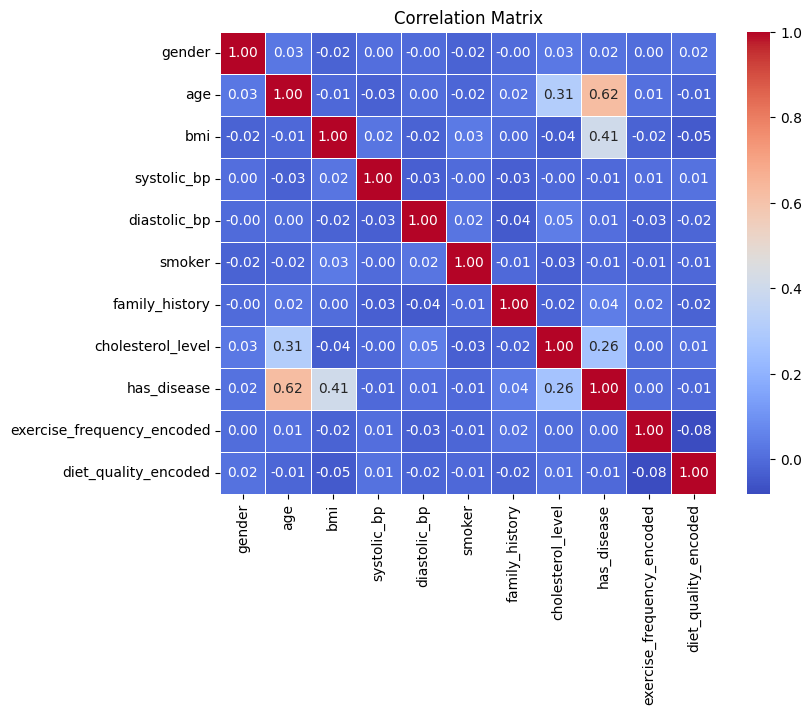

In [29]:
correlation_matrix = DF_clean.corr()

# 3. Create the heatmap
plt.figure(figsize=(8, 6)) # Adjust figure size for better readability
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f", linewidths=.5) #
plt.title('Correlation Matrix') # Add a title to your plot
plt.show() # Display the plot

### 3. Model Selection & Evaluation

In [30]:
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.linear_model import SGDClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import cross_val_score
from sklearn.metrics import mean_squared_error


In [31]:
X = DF_clean.drop('has_disease', axis=1)
y = DF_clean['has_disease']
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.15, random_state=24)

In [32]:
def print_scores (X_train, X_test, y_train, y_test, ML_model):
    
    predictions = ML_model.predict(X_test)
    MSE = mean_squared_error(y_test, predictions)

    train = ML_model.score(X_train, y_train)
    test = ML_model.score(X_test, y_test)
    score = cross_val_score(ML_model, X_scaled, y, cv=5, scoring= "f1_macro")


    print(f"Model: {ML_model}")
    print(f"Average F1 Score: {np.mean(score)}")
    print(f"The MSE for the model is: {MSE}") 
    print(f"Training Data R2 Score is: {train}")
    print(f"Testing Data R2 Score is: {test}")
    print(f'') 



In [33]:
logreg = LogisticRegression()
logreg.fit(X_train, y_train)
print_scores(X_train, X_test, y_train, y_test, logreg)



Model: LogisticRegression()
Average F1 Score: 0.868020410202359
The MSE for the model is: 0.13333333333333333
Training Data R2 Score is: 0.8730734360834089
Testing Data R2 Score is: 0.8666666666666667



In [34]:
print(y_train.value_counts(normalize=True))


has_disease
0    0.503173
1    0.496827
Name: proportion, dtype: float64


In [35]:

digit_clf = SGDClassifier(random_state=24)
digit_clf.fit(X_train, y_train)
print_scores(X_train, X_test, y_train, y_test, digit_clf)


Model: SGDClassifier(random_state=24)
Average F1 Score: 0.8509159272072144
The MSE for the model is: 0.18461538461538463
Training Data R2 Score is: 0.8540344514959202
Testing Data R2 Score is: 0.8153846153846154



In [36]:
tre_clf = DecisionTreeClassifier(random_state=24)
tre_clf.fit(X_train, y_train)
print_scores(X_train, X_test, y_train, y_test, tre_clf)


Model: DecisionTreeClassifier(random_state=24)
Average F1 Score: 0.8302179134924611
The MSE for the model is: 0.24615384615384617
Training Data R2 Score is: 1.0
Testing Data R2 Score is: 0.7538461538461538



k: 1, Train/Test Score: 1.000/0.733
k: 3, Train/Test Score: 0.913/0.779
k: 5, Train/Test Score: 0.896/0.815
k: 7, Train/Test Score: 0.889/0.831
k: 9, Train/Test Score: 0.890/0.856
k: 11, Train/Test Score: 0.888/0.841
k: 13, Train/Test Score: 0.888/0.831
k: 15, Train/Test Score: 0.877/0.846
k: 17, Train/Test Score: 0.871/0.851
k: 19, Train/Test Score: 0.872/0.856


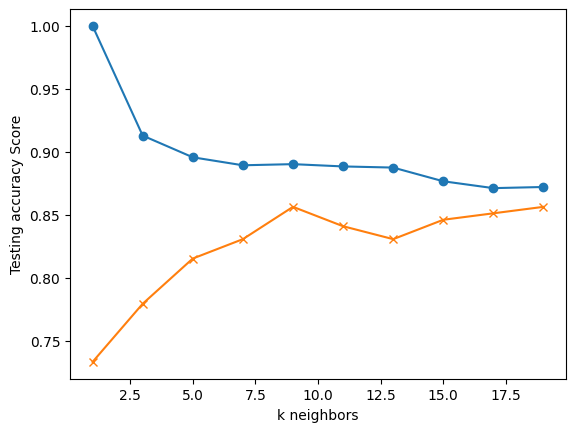

In [37]:
from sklearn.neighbors import KNeighborsClassifier

train_scores = []
test_scores = []
for k in range(1, 20, 2):
    knn = KNeighborsClassifier(n_neighbors=k)
    knn.fit(X_train, y_train)
    train_score = knn.score(X_train, y_train)
    test_score = knn.score(X_test, y_test)
    train_scores.append(train_score)
    test_scores.append(test_score)
    print(f"k: {k}, Train/Test Score: {train_score:.3f}/{test_score:.3f}")
    
    
plt.plot(range(1, 20, 2), train_scores, marker='o')
plt.plot(range(1, 20, 2), test_scores, marker="x")
plt.xlabel("k neighbors")
plt.ylabel("Testing accuracy Score")
plt.show()

In [38]:
knn = KNeighborsClassifier(n_neighbors= 9)
knn.fit(X_train, y_train)
print_scores(X_train, X_test, y_train, y_test, knn)


Model: KNeighborsClassifier(n_neighbors=9)
Average F1 Score: 0.836594815200376
The MSE for the model is: 0.14358974358974358
Training Data R2 Score is: 0.8902991840435177
Testing Data R2 Score is: 0.8564102564102564



### 4. Model Feature Engineering 

In [39]:
# Using a log transformer on the data before fiting to the model since LogisticRegression performed the best.
from sklearn.preprocessing import FunctionTransformer
transform = FunctionTransformer(func=np.log1p)
transformed_data = transform.fit_transform(DF_clean)
transformed_data_test = transform.fit_transform(DF_clean_test2)

In [40]:
X_tranformed = transformed_data.drop('has_disease', axis=1)
y = DF_clean['has_disease']

X_traint, X_testt, y_traint, y_testt = train_test_split(X_tranformed, y, test_size=0.15, random_state=24)

In [41]:
logregt = LogisticRegression()
logregt.fit(X_traint, y_traint)
print_scores(X_traint, X_testt, y_traint, y_testt, logregt)



Model: LogisticRegression()
Average F1 Score: 0.868020410202359
The MSE for the model is: 0.1282051282051282
Training Data R2 Score is: 0.8658204895738894
Testing Data R2 Score is: 0.8717948717948718



In [42]:

X = df_training.drop('has_disease', axis=1)
y = df_training['has_disease']



In [43]:
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder, StandardScaler
from sklearn.impute import SimpleImputer
from sklearn.pipeline import Pipeline

# Define columns
numeric_features = ['age', 'bmi', 'systolic_bp', 'diastolic_bp', 'smoker', 'family_history', 'cholesterol_level' ]
categorical_features = ['gender', 'exercise_frequency', 'diet_quality']

# Pipelines
numeric_transformer = Pipeline([
    ('imputer', SimpleImputer(strategy='median')),
    ('scaler', StandardScaler())
])

categorical_transformer = Pipeline([
    ('imputer', SimpleImputer(strategy='most_frequent')),
    ('onehot', OneHotEncoder(handle_unknown='ignore'))
])

# ColumnTransformer
preprocessor = ColumnTransformer([
    ('num', numeric_transformer, numeric_features),
    ('cat', categorical_transformer, categorical_features)
])


In [44]:
from sklearn.linear_model import LogisticRegression
from sklearn.pipeline import Pipeline

clf = Pipeline([
    ('preprocessor', preprocessor),
    ('classifier', LogisticRegression(max_iter=1000))
])

clf.fit(X, y)


,steps,"[('preprocessor', ...), ('classifier', ...)]"
,transform_input,None
,memory,None
,verbose,False
,transformers,"[('num', ...), ('cat', ...)]"
,remainder,'drop'
,sparse_threshold,0.3
,n_jobs,None
,transformer_weights,None
,verbose,False
,verbose_feature_names_out,True


In [45]:
score = cross_val_score(clf, X, y, cv=5, scoring= "f1_macro")
print(f"Model: {clf}")
print(f"Average F1 Score: {np.mean(score)}")

Model: Pipeline(steps=[('preprocessor',
                 ColumnTransformer(transformers=[('num',
                                                  Pipeline(steps=[('imputer',
                                                                   SimpleImputer(strategy='median')),
                                                                  ('scaler',
                                                                   StandardScaler())]),
                                                  ['age', 'bmi', 'systolic_bp',
                                                   'diastolic_bp', 'smoker',
                                                   'family_history',
                                                   'cholesterol_level']),
                                                 ('cat',
                                                  Pipeline(steps=[('imputer',
                                                                   SimpleImputer(strategy='most_frequent')),
              

### 5. Model Testing & Predictions 

In [46]:
predictionst = logregt.predict(transformed_data_test)
DF_clean_test2['Predicted_has_disease'] = predictionst

In [47]:
DF_clean_test2.to_csv('answers.csv', index=False)  

### 6. Conclusion

The best model was the LogisticRegression Classifier with with a logistic transformation. It acieved a Average F1 Score of 0.868. 
This was the same as F1 score with the same model without transformation, however it had a slightly higher R2 on the testing dataset so I used this model with log tranfomer on the Test csv.

There are however severl things that we could have impacted how performance and we experimented with ways to mitigate them. 
First and foremost was the way we decided with handling the NULL values. Since this was a fairly small dataset we decided to impute the NULL values after dropping the outliners per Z-score.
This could have impacted the data since the most common exercise frequency was frequently which I thought was curious. I also tried dopping the NULL rows but there was a slight decrease in F1. 
